In [1]:
%reload_ext autoreload

%autoreload 2
import numpy as np
from models import lstm
import torch

In [2]:
# FILES TO CHANGE (This is where your sequence_nlp_harvey.zip etc is) 

NPY_INPUT_DIR = '/Users/ianmagnusson/IITUDND/data/extracted_features/combined_NLP/harvey2/'


In [3]:
# load data from files

X_seq_tfidf_train = np.load(NPY_INPUT_DIR + 'X_seq_tfidf_train.npz')
X_seq_tfidf_test = np.load(NPY_INPUT_DIR + 'X_seq_tfidf_test.npz')


X_seq_glove_train = np.load(NPY_INPUT_DIR + 'X_seq_glove_train.npz')
X_seq_glove_test = np.load(NPY_INPUT_DIR + 'X_seq_glove_test.npz')

y_train = torch.Tensor(np.load(NPY_INPUT_DIR + 'y_train.npy'))
y_test = torch.Tensor(np.load(NPY_INPUT_DIR + 'y_test.npy'))

In [4]:
# format npz objects as lists of arrays again
X_tfidf_train = [ torch.Tensor(X_seq_tfidf_train[file]) for file in X_seq_tfidf_train.files]
X_tfidf_test = [ torch.Tensor(X_seq_tfidf_test[file]) for file in X_seq_tfidf_test.files]

X_glove_train = [ torch.Tensor(X_seq_glove_train[file]) for file in X_seq_glove_train.files]
X_glove_test = [ torch.Tensor(X_seq_glove_test[file]) for file in X_seq_glove_test.files]

In [5]:
# build lists with features concatenated

from sklearn.preprocessing import StandardScaler

X_raw_train = []
for i in range(len(y_train)):
    file = X_seq_tfidf_train.files[i]
    X_raw_train.append(np.concatenate((X_seq_tfidf_train[file], X_seq_glove_train[file]), axis=1))

scaler = StandardScaler()
X_fit_train = np.concatenate(X_raw_train)
scaler.fit(X_fit_train)

X_train = [torch.Tensor(scaler.transform(X_i)) for X_i in X_raw_train]

X_test = []
for i in range(len(y_test)):
    file = X_seq_tfidf_test.files[i]
    X_test.append(torch.Tensor(scaler.transform(np.concatenate((X_seq_tfidf_test[file], X_seq_glove_test[file]), axis=1))))


In [6]:
# build and train model
model = lstm.LSTM(input_dim = 400, hidden_dim = 492, num_layers = 2, bidirectional = False,
                  learning_rate = 0.06594170753730186, momentum = 0.4155718228778864, decay_factor = 0.9994799511941715)
model.learn(X_train, y_train, epochs=1)

#torch.save(model.state_dict(), 'optim_irma_lstm.pt')

#model.load_state_dict(torch.load('norm_harvey_lstm.pt'))
#model.eval()


epoch: 0 learning rate: [0.06594170753730186]


In [7]:
# evaluate
model.get_accuracy(X_test, y_test)

0.8220024721878862

R2 score for bin 0 = 0.1781242013800154
R2 score for bin 1 = -0.05085625324338339
R2 score for bin 2 = 0.14686552072800807
R2 score for bin 3 = 0.03691066997518633
R2 score for bin 4 = 0.07407407407407396
R2 score for bin 5 = -0.2406015037593987
True proportion of + scores in bin 0 = 0.6791044776119403
True proportion of + scores in bin 1 = 0.6962962962962963
True proportion of + scores in bin 2 = 0.6814814814814815
True proportion of + scores in bin 3 = 0.7703703703703704
True proportion of + scores in bin 4 = 0.8
True proportion of + scores in bin 5 = 0.8444444444444444


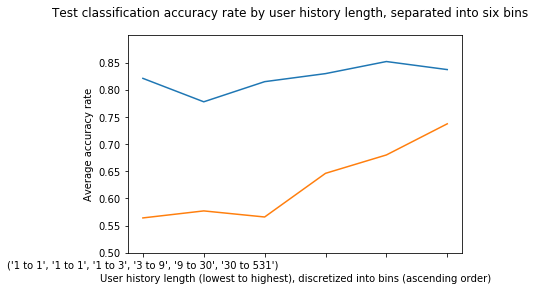

([('1 to 1', '1 to 1', '1 to 3', '3 to 9', '9 to 30', '30 to 531')],
 [0.8208955223880597,
  0.7777777777777778,
  0.8148148148148148,
  0.8296296296296296,
  0.8518518518518519,
  0.837037037037037])

In [8]:
model.get_accuracy_graph(X_test, y_test)

In [9]:
model.get_auc(X_test, y_test)


0.8394677099937207